### Random Forest 
Ahora seleccionaremos el segundo algoritmo para poder correr y entrenar el modelo y hacer más robusto nuestro modelo

None
Col_number
None
Col_number
Accuracy score for test data is: 0.9811011904761905
             PREDICCION NO APROBADO  PREDICCION APROBADO
NO APROBADO                    8790                  365
APROBADO                        651                43954


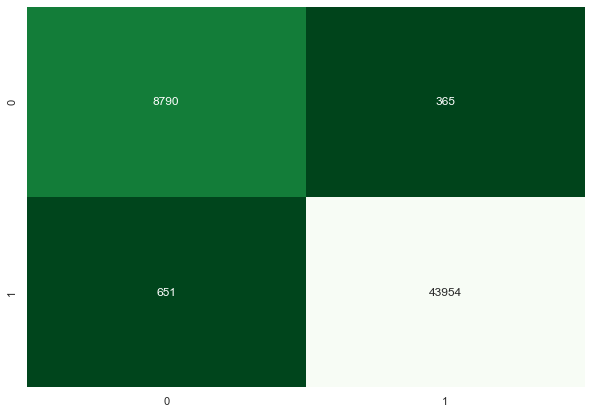

dot: graph is too large for cairo-renderer bitmaps. Scaling by 0.778092 to fit

Populating the interactive namespace from numpy and matplotlib


C:\ProgramData\Anaconda3\lib\site-packages\IPython\core\magics\pylab.py:159: UserWarning: pylab import has clobbered these variables: ['var', 'cm']
`%matplotlib` prevents importing * from pylab and numpy
  warn("pylab import has clobbered these variables: %s"  % clobbered +


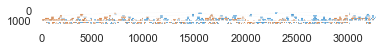

In [3]:
#Corremos librerias y EDA para traer el dataframe limpio que estaremos usando
%run ./START.ipynb
%run ./EDA.ipynb
%run ./DECISION_TREE.ipynb

In [10]:
#Creamos un random forest! random_state = semilla
RFmodel = RandomForestClassifier(random_state=5050, n_estimators=5, class_weight="balanced", max_features="log2")
RFmodel.fit(x_train, y_train)

RandomForestClassifier(class_weight='balanced', max_features='log2',
                       n_estimators=5, random_state=5050)

In [5]:
RFmodel.score(df_all_test, y_pred_test) # n_estimators=1000

0.9814360119047619

In [7]:
RFmodel.score(df_all_test, y_pred_test) # n_estimators=500

0.9815290178571429

In [9]:
RFmodel.score(df_all_test, y_pred_test) # n_estimators=50

0.9824032738095239

In [11]:
RFmodel.score(df_all_test, y_pred_test) #n_estimators=5

0.9766369047619048

Notamos que entre las 4 pruebas que se realizaron no obtuvimos mucha diferencia entre el margen 50 a 1000 pero notamos que el que se realizo con el número más alto dio el mejor resultado, por lo que decidimos quedarnos que el de 1000

#### Métricas
En este caso ultilizaremos el Accuracy como metrica para determinar que un modelo es mucho mejor que otro

In [13]:
y_predicted = RFmodel.predict(df_all_test)
y_predicted

array([0, 0, 0, ..., 1, 0, 1], dtype=int64)

In [14]:
from sklearn.metrics import confusion_matrix
cm2 = pd.DataFrame(confusion_matrix(y_test, y_predicted))

cm2.index = ['NO APROBADO','APROBADO']
cm2.columns = ['PREDICCION NO APROBADO','PREDICCION APROBADO']
print(cm2)
from sklearn.metrics import accuracy_score

#accuracy
print('Accuracy score for test data is:', accuracy_score(y_test, y_predicted)) 

             PREDICCION NO APROBADO  PREDICCION APROBADO
NO APROBADO                    8402                  753
APROBADO                        549                44056
Accuracy score for test data is: 0.97578125


**Conclusión**

Podemos notar que tenemos un Accuracy de 98,08%. 
Podemos notar que la cantidad de falsos positivos es de 639 y los falsos negativos es de 390

<AxesSubplot:>

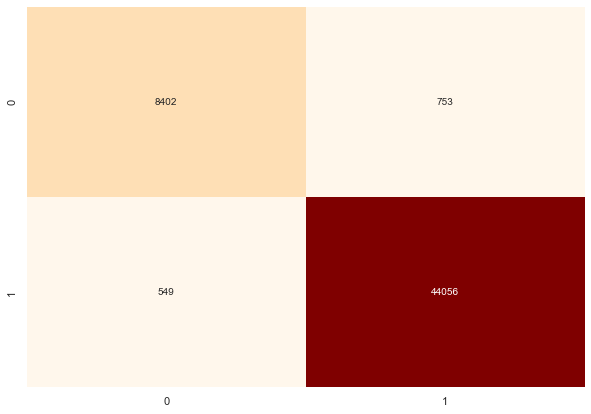

In [15]:
#Matriz De Confusión
from sklearn.metrics import confusion_matrix, classification_report
cm = confusion_matrix (y_test, y_predicted)
fig, ax = plt.subplots(figsize=(10,7))
sns.heatmap(cm, annot=True, cmap='OrRd', fmt='2g', cbar=None)

### **CONCLUSIÓN**

Recordemos los resultados de los algoritmos que entrenamos.

En el caso del "Arbol de decisión" fueron:

*   Accuracy de 98,11%
*   Falsos Positivos: 365
*   Falsos Negativos: 651

Y en el caso de del "Random Forest" tenemos:

*   Accuracy de 98,08%
*   Falsos Positivos: 639
*   Falsos Negativos: 390

Teniendo esto en cuenta, la conclusion a la que llegamos es que, a priori el algoritmo que mejor se adecua al plan de negocio es el Árbol de Decision, dado que los Falsos Positivos son menos que los del Random Forest.
Ya que es mejor que el banco reciba reclamos por no poder sacar un credito, que ototgar un prestamos a alguien que no pueda pagarlo a futuro.
